# Introduction

The dataset that is used for this task contains global temperature along with the changes in more than past 2 centuries. Here, I try to get some insight using the dataset and make some conclusion supported by the it. We start by loading the data.

In [2]:
major_city <- read.csv(file="GlobalLandTemperaturesByMajorCity.csv", header=TRUE, sep=",")
global <- read.csv(file="GlobalTemperatures.csv", header=TRUE, sep=",")

Before we can start exploring the data, it is always adviced to see the structure of the data so as to understand the data even better.

In [3]:
str(major_city)

'data.frame':	239177 obs. of  7 variables:
 $ dt                           : Factor w/ 3239 levels "1743-11-01","1743-12-01",..: 1263 1264 1265 1266 1267 1268 1269 1270 1271 1272 ...
 $ AverageTemperature           : num  26.7 27.4 28.1 26.1 25.4 ...
 $ AverageTemperatureUncertainty: num  1.44 1.36 1.61 1.39 1.2 ...
 $ City                         : Factor w/ 100 levels "Abidjan","Addis Abeba",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Country                      : Factor w/ 49 levels "Afghanistan",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ Latitude                     : Factor w/ 49 levels "0.80N","0.80S",..: 40 40 40 40 40 40 40 40 40 40 ...
 $ Longitude                    : Factor w/ 93 levels "0.00W","103.66E",..: 39 39 39 39 39 39 39 39 39 39 ...


Now that we have the data in hand, we can start by exploring it. Since I am interested in knowing the annual change in temperature in last two centuries, I wrangled the data by grouping them according to the years and then plot a graph. 

# Exploring Data

In [4]:
str(global)

'data.frame':	3192 obs. of  9 variables:
 $ dt                                       : Factor w/ 3192 levels "1750-01-01","1750-02-01",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ LandAverageTemperature                   : num  3.03 3.08 5.63 8.49 11.57 ...
 $ LandAverageTemperatureUncertainty        : num  3.57 3.7 3.08 2.45 2.07 ...
 $ LandMaxTemperature                       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandMaxTemperatureUncertainty            : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandMinTemperature                       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandMinTemperatureUncertainty            : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandAndOceanAverageTemperature           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandAndOceanAverageTemperatureUncertainty: num  NA NA NA NA NA NA NA NA NA NA ...


In [5]:
global$year = format(as.Date(global$dt) ,"%Y")
global_grouped = aggregate(global[, 2:9], list(global$year), mean)
global_grouped = global_grouped[101:dim(global_grouped)[1],]
str(global_grouped)

'data.frame':	166 obs. of  9 variables:
 $ Group.1                                  : chr  "1850" "1851" "1852" "1853" ...
 $ LandAverageTemperature                   : num  7.9 8.18 8.1 8.04 8.21 ...
 $ LandAverageTemperatureUncertainty        : num  0.876 0.882 0.918 0.835 0.826 ...
 $ LandMaxTemperature                       : num  13.5 13.1 13.4 13.9 14 ...
 $ LandMaxTemperatureUncertainty            : num  2.39 2.4 2.62 2.1 1.78 ...
 $ LandMinTemperature                       : num  1.96 2.2 2.34 1.89 1.76 ...
 $ LandMinTemperatureUncertainty            : num  1.57 1.63 1.38 1.36 1.36 ...
 $ LandAndOceanAverageTemperature           : num  14.9 15 15 15 15 ...
 $ LandAndOceanAverageTemperatureUncertainty: num  0.308 0.312 0.316 0.284 0.276 ...


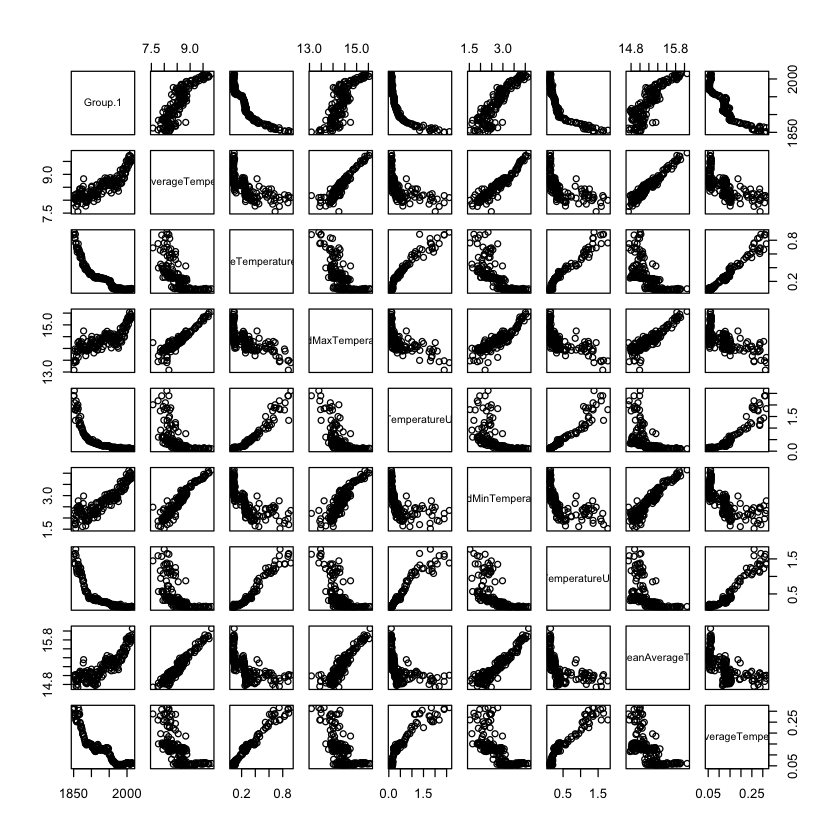

In [6]:
plot(global_grouped)

### Land Temperature vs Years 

In [7]:
library(ggplot2)
plot_1 = ggplot(global_grouped,aes(Group.1,LandAverageTemperature)) + geom_point(color = "brown",shape = 2) 
plot_1 = plot_1 + geom_smooth(method = lm,formula = y~ poly(x, 3),se = FALSE,color="red",aes(group=1))
plot_1 = plot_1 +   labs(x = "Year from 1850 to 2015", y = "Average Land Temperature",title = "Global Land Average")
plot_1 = plot_1 + scale_x_discrete(breaks=c("1850","1930","2013"))+ theme(axis.text.x = element_text(angle = 90)) 


Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”

### Land Temperature Uncertainty vs Years

In [8]:
plot_2 = ggplot(global_grouped,aes(Group.1,LandAverageTemperatureUncertainty)) + geom_point(color = "brown",shape = 6) 
plot_2 = plot_2 + geom_smooth(method = lm,formula = y~ poly(x, 3),se = FALSE,color="red",aes(group=1))
plot_2 = plot_2 +   labs(x = "Year from 1850 to 2015", y = "Average Land Temperature Uncertainty",title = "Global Land Uncertainty")
plot_2 = plot_2 + scale_x_discrete(breaks=c("1850","1930","2013")) + theme(axis.text.x = element_text(angle = 90)) 

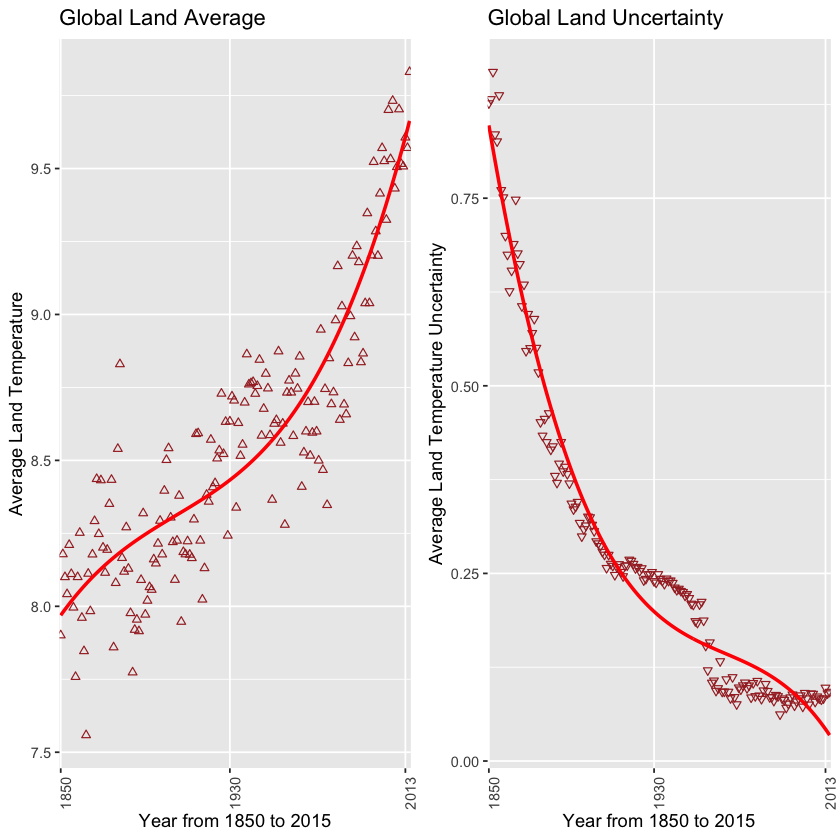

In [9]:
library(gridExtra) 
grid.arrange(plot_1,plot_2,ncol = 2)

The the graph above on the left is a plot of Year vs Average Land Temperature. The data here shows a very interesting pattern. It is quite spread in the initial years and becomes quite narrow in the last 50 years. Also, The constant growth that was expected is not quite clear as the average temperature drops down or rises up sharply in the begining years and then rises exponentially after fist two quarters.


The graph on the right suggests that the uncertainty in temperature has been decreasing exponentially. Initially I thought it was a good sign as the noise in temerature is decreasing but `Plot 1` suggests that the decrease uncertainty is probably due to increase in temperature. We can also compare the two graphs by placing them side to side. 

In [10]:
str(global_grouped)

'data.frame':	166 obs. of  9 variables:
 $ Group.1                                  : chr  "1850" "1851" "1852" "1853" ...
 $ LandAverageTemperature                   : num  7.9 8.18 8.1 8.04 8.21 ...
 $ LandAverageTemperatureUncertainty        : num  0.876 0.882 0.918 0.835 0.826 ...
 $ LandMaxTemperature                       : num  13.5 13.1 13.4 13.9 14 ...
 $ LandMaxTemperatureUncertainty            : num  2.39 2.4 2.62 2.1 1.78 ...
 $ LandMinTemperature                       : num  1.96 2.2 2.34 1.89 1.76 ...
 $ LandMinTemperatureUncertainty            : num  1.57 1.63 1.38 1.36 1.36 ...
 $ LandAndOceanAverageTemperature           : num  14.9 15 15 15 15 ...
 $ LandAndOceanAverageTemperatureUncertainty: num  0.308 0.312 0.316 0.284 0.276 ...


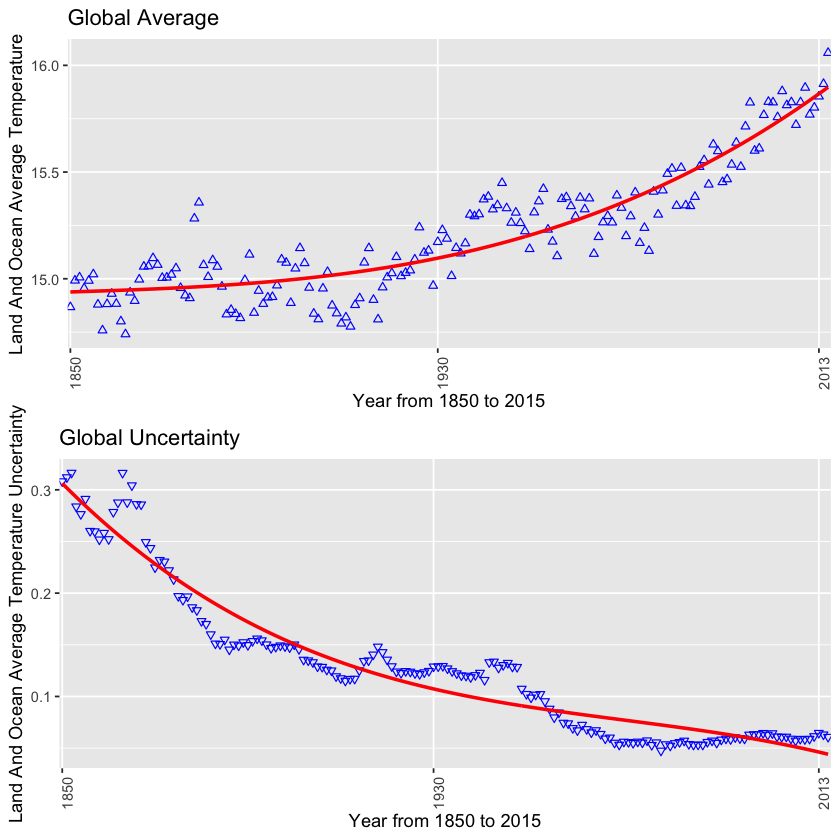

In [11]:
plot_7 = ggplot(global_grouped,aes(Group.1,LandAndOceanAverageTemperature)) + geom_point(color = "blue",shape = 2) 
plot_7 = plot_7 + geom_smooth(method = lm,formula = y~ poly(x, 3),se = FALSE,color="red",aes(group=1))
plot_7 = plot_7 +   labs(x = "Year from 1850 to 2015", y = "Land And Ocean Average Temperature",title = "Global Average") 
plot_7 = plot_7 + scale_x_discrete(breaks=c("1850","1930","2013")) + theme(axis.text.x = element_text(angle = 90)) 
plot_8 = ggplot(global_grouped,aes(Group.1,LandAndOceanAverageTemperatureUncertainty)) + geom_point(color = "blue",shape = 6) 
plot_8 = plot_8 + geom_smooth(method = lm,formula = y~ poly(x, 3),se = FALSE,color="red",aes(group=1))
plot_8 = plot_8 +   labs(x = "Year from 1850 to 2015", y = "Land And Ocean Average Temperature Uncertainty",title = "Global Uncertainty")
plot_8 = plot_8 + scale_x_discrete(breaks=c("1850","1930","2013")) + theme(axis.text.x = element_text(angle = 90)) 
grid.arrange(plot_7,plot_8,ncol = 1)

Not only this but also, wish to compare the results with the temperature rise and uncertainty in major city vs around the world.

Before we can do that we need to manipulate the data for cities to increase the accuracy. 

### Major Cities Data

In [12]:
major_city$year = format(as.Date(major_city$dt) ,"%Y")
len = dim(major_city)[1]
for (each in c(len:1)){
    if (is.na(major_city[each,2])){
        if (each+1 %in% len && !(is.na(major_city[each+1,2])) && (major_city[each,4] == major_city[each+1,4])){
            major_city[each,2] = major_city[each+1,2]
        }
    }
    if (is.na(major_city[each,3])){
        if (each+1 %in% len && !(is.na(major_city[each+1,3])) && (major_city[each,4] == major_city[each+1,4])){
            major_city[each,3] = major_city[each+1,3]
        }
    }
}

for (each in c(1:len)){
    if (is.na(major_city[each,2])){
        if (each-1 %in% len && !(is.na(major_city[each-1,2])) && (major_city[each,4] == major_city[each-1,4])){
            major_city[each,2] = major_city[each-1,2]
        }
    }
    if (is.na(major_city[each,3])){
        if (each-1 %in% len && !(is.na(major_city[each-1,3])) && (major_city[each,4] == major_city[each-1,4])){
            major_city[each,3] = major_city[each-1,3]
        }
    }
}

In [13]:
major_city$year = format(as.Date(major_city$dt) ,"%Y")
major_city = major_city[which(major_city$year >= 1850),]
city_grouped = aggregate(major_city[, 2:3], list(major_city$year), mean)




In [14]:
plot_3 = ggplot(city_grouped,aes(Group.1,AverageTemperature)) + geom_point(color = "green",shape = 2) 
plot_3 = plot_3 + geom_smooth(method = lm,formula = y~ poly(x, 3),se = FALSE,color="red",aes(group=1))
plot_3 = plot_3 + labs(x = "Year from 1849 to 2013", y = "Average Temperature",title = "Major Cities Average") 
plot_3 = plot_3 + scale_x_discrete(breaks=c("1850","1930","2013")) + theme(axis.text.x = element_text(angle = 90)) 


In [15]:
plot_4 = ggplot(city_grouped,aes(Group.1,AverageTemperatureUncertainty)) + geom_point(color = "green",shape = 6) 
plot_4 = plot_4 + geom_smooth(method = lm,formula = y~ poly(x, 3),se = FALSE,color="red",aes(group=1))
plot_4 = plot_4 + labs(x = "Year from 1849 to 2013", y = "Average Temperature Uncertainty",title = "Major Cities Uncertainty") 
plot_4 = plot_4 + scale_x_discrete(breaks=c("1850","1930","2013")) + theme(axis.text.x = element_text(angle = 90)) 

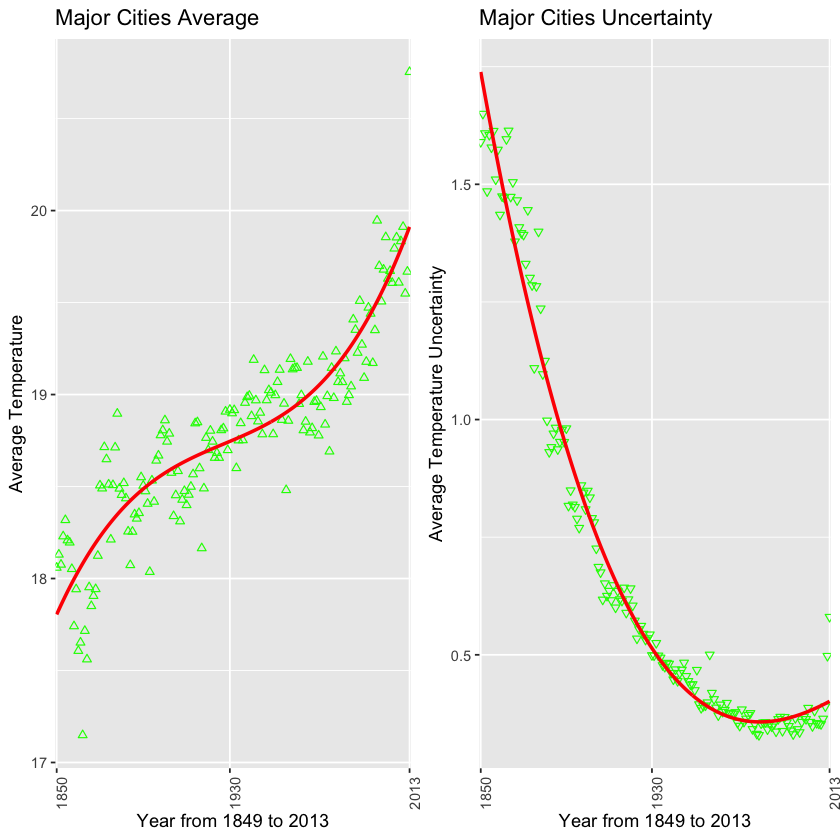

In [16]:
grid.arrange(plot_3,plot_4,ncol = 2)

## Global vs Major Cities

Comparing the two different data sources 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

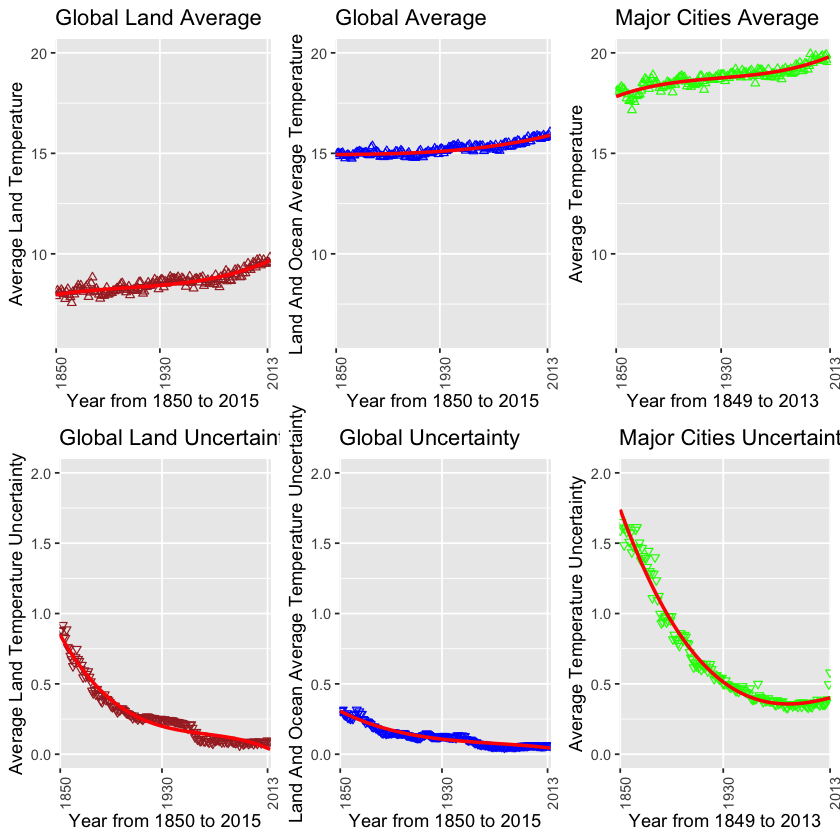

In [17]:
 
grid.arrange(plot_1+ylim(6, 20) ,plot_7+ylim(6, 20) ,plot_3+ylim(6, 20) ,plot_2+ylim(0, 2),plot_8+ylim(0, 2),plot_4+ylim(0, 2),ncol = 3)


Here, there is one thing very important to notice is that the major cities are have more average temperature than rest of the world which could increase the average temperature than what is normal. Also, The uncertainity in major cities has decresed much more than the rest of the globe.

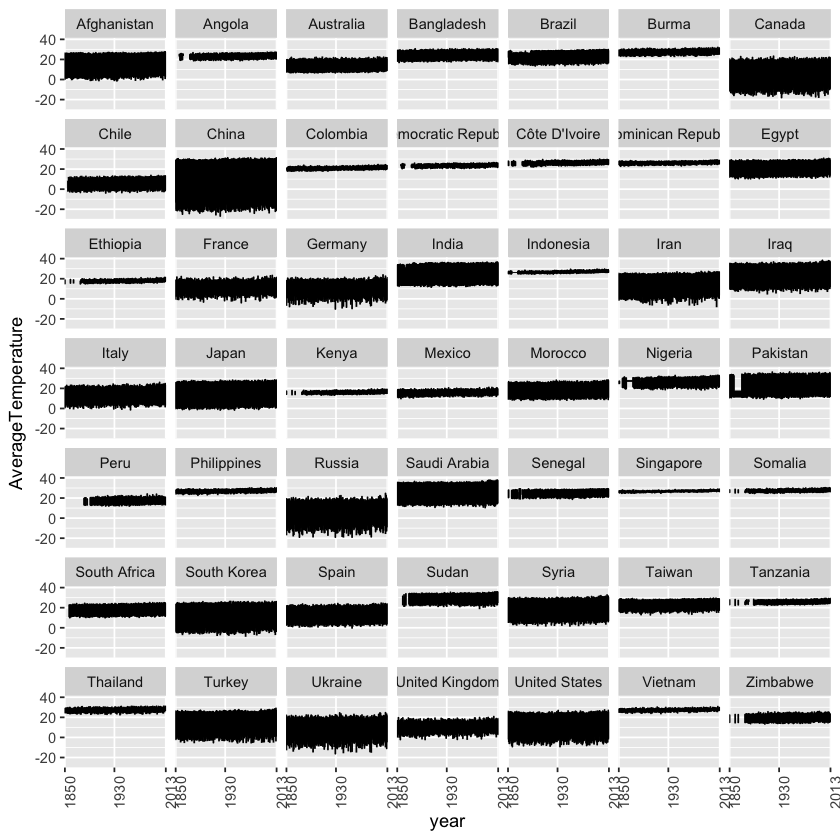

In [18]:
plot_9 = ggplot(major_city,aes(year,AverageTemperature)) + geom_line() 
plot_9 = plot_9 + facet_wrap(~Country)+ scale_x_discrete(breaks=c("1850","1930","2013"))
plot_9 = plot_9 + theme(axis.text.x = element_text(angle = 90))  
plot_9

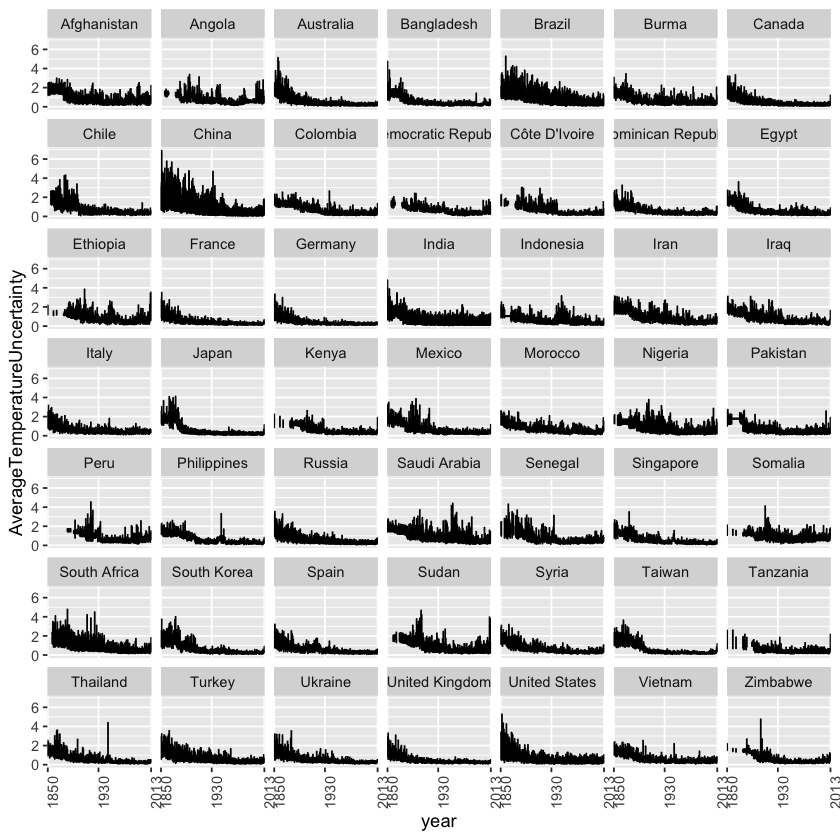

In [19]:
plot_10 = ggplot(major_city,aes(year,AverageTemperatureUncertainty)) + geom_line() 
plot_10 = plot_10 + facet_wrap(~Country)+ scale_x_discrete(breaks=c("1850","1930","2013"))
plot_10 = plot_10 + theme(axis.text.x = element_text(angle = 90))  
plot_10

# Interactive Maps - (R Studio)

Since Jupyter Notebook (The IDE used for above graphs) does not support leaflets (a library for interactive maps), I have used R-studio for that purpose. The Maps are interactve and displays the temperature average for the major cities and top 10 major cities with maximum average temperature. It helps us understand that major cities in developing nations and near the equator have higher average temperature compared to the rest.

Since R-studio was used for the task, the qulatity of the document is expected to change for the rest of the visualisations.